In [1]:
import traceback
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import os
%matplotlib inline

In [2]:
def tflog2pandas(path):
    runlog_data = pd.DataFrame({"metric": [], "value": [], "step": []})
    try:
        event_acc = EventAccumulator(path)
        event_acc.Reload()
        tags = event_acc.Tags()["scalars"]
        print(event_acc)
        for tag in tags:
            event_list = event_acc.Scalars(tag)
            values = list(map(lambda x: x.value, event_list))
            step = list(map(lambda x: x.step, event_list))
            r = {"metric": [tag] * len(step), "value": values, "step": step}
            r = pd.DataFrame(r)
            runlog_data = pd.concat([runlog_data, r])
    # Dirty catch of DataLossError
    except Exception:
        print("Event file possibly corrupt: {}".format(path))
        traceback.print_exc()
    return runlog_data


In [3]:
df1 = tflog2pandas('train_log/default_modalityNone_gmc_transformers_None_20_15_24000_tiny224_16000_32-FrameEncoder2-0.01-0.99-transition-1-0.01-0.99-5-0.01-[0, 1, 65, 66]/transformers/version_0/')
df2 = tflog2pandas('train_log/winner_modalityNone_gmc_transformers_None_20_15_24000_tiny224_16000_32-FrameEncoder2-0.01-0.99-transition-1-0.01-0.99-5-0.01-[0, 1, 65, 66]/transformers/version_0/')
df3 = tflog2pandas('train_log/new_modalityNone_gmc_transformers_None_20_15_24000_tiny224_16000_32-FrameEncoder2-0.01-0.99-transition-1-0.01-0.99-5-0.01-[0, 1, 65, 66]/transformers/version_0/')

In [4]:
df1[df1['metric'] == 'total_loss_val']

,metric,value,step


In [8]:
set(df1['metric'])

{'epoch',
 'hp_metric',
 'loss_gmc_train',
 'loss_gmc_val',
 'loss_reconstruction_train',
 'loss_reconstruction_val',
 'total_loss_train',
 'total_loss_val',
 'weight_gmc',
 'weight_reconstruction'}

In [5]:
df1.shape, df2.shape, df3.shape

((0, 3), (0, 3), (0, 3))

In [5]:
dataframes = {
    'default': df1,
    'winner': df2,
    'new': df3
}


default
winner
new


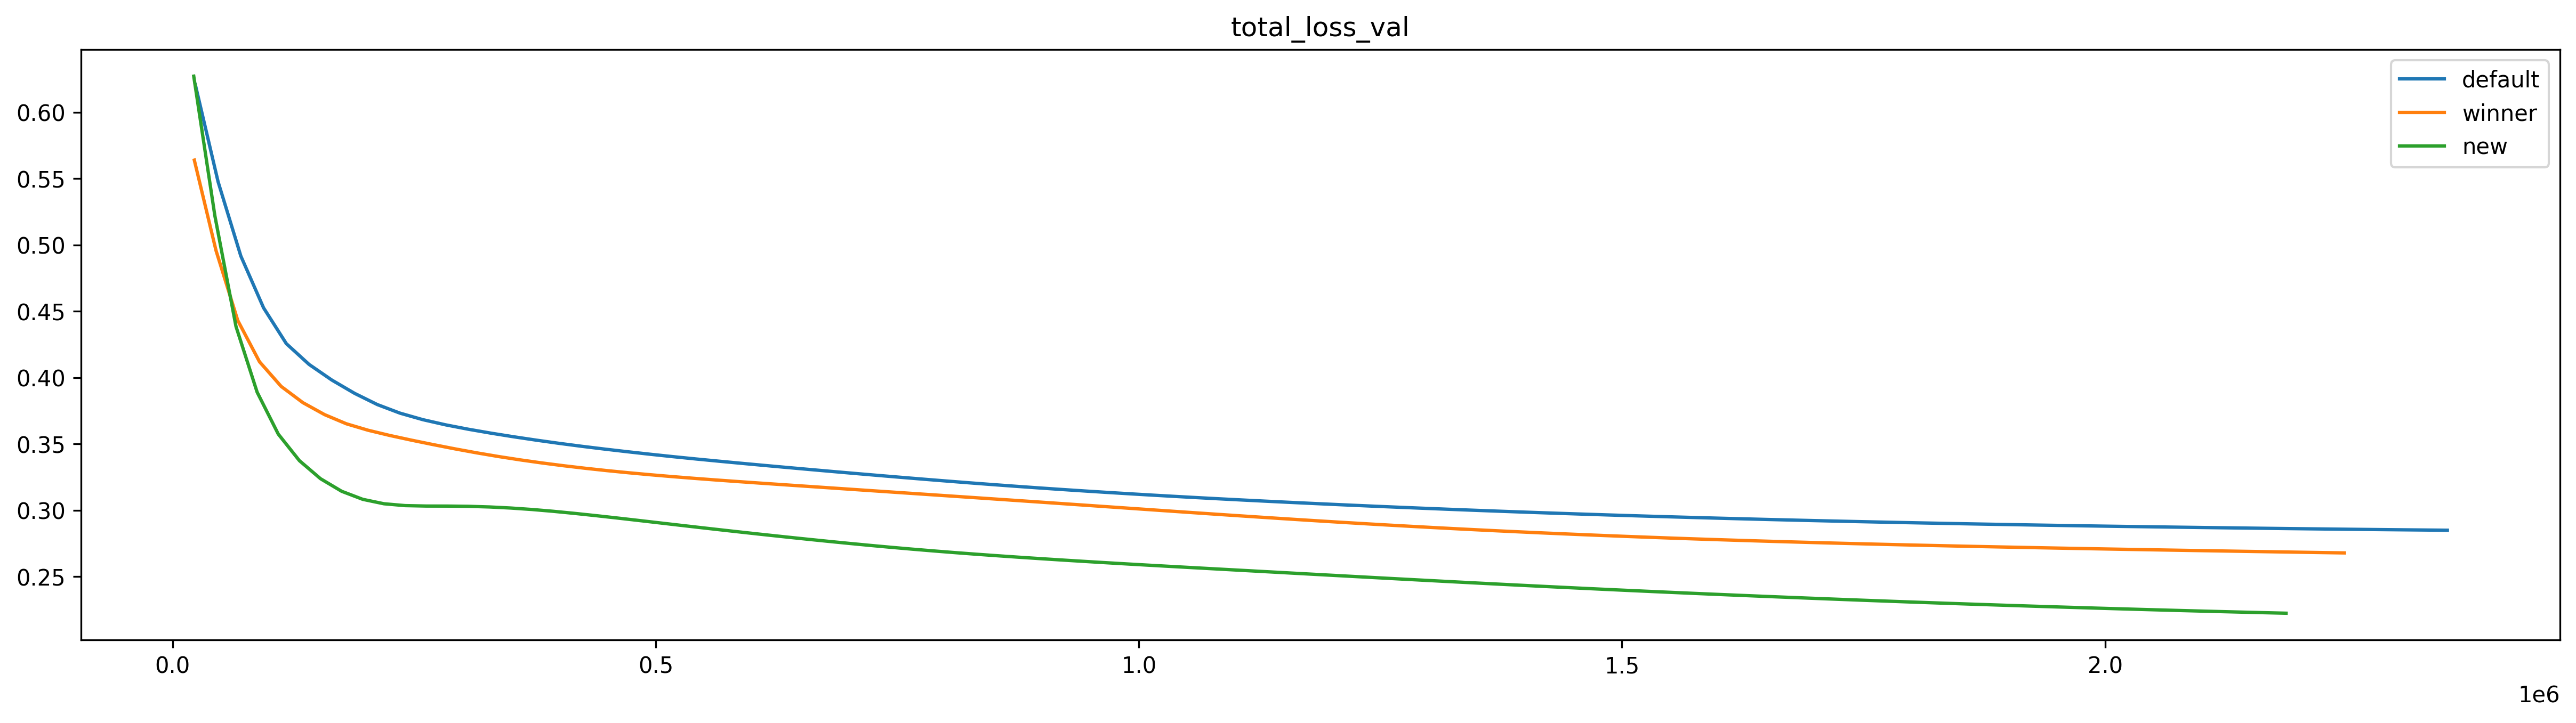

In [6]:

import numpy as np
def plot(data, metric, smoothing=0, subsampling=0):
    plt.figure(figsize=(20, 4.8), dpi=300)
    for key, frame in data.items():
        print(key)
        tag_data = frame[frame['metric'] == metric]
        y = tag_data['value']
        x = tag_data['step']
        if smoothing > 0:
            print('perform smoothing')
            x_smoothed = np.zeros_like(x)
            for i in range(smoothing):
                x_smoothed[i] = x[i]
            for i in range(smoothing, len(x)):
                x_smoothed[i] = np.mean(x[i - smoothing + 1:i + 1])
            x = x_smoothed
        if subsampling > 0:
            x = x[::subsampling]
            y = y[::subsampling]
        plt.plot(x, y, label=key)
        plt.legend()
    plt.title(f'{metric} subsampling 1/{subsampling}' if subsampling > 0 else f'{metric}')
    # plt.show()
    plt.savefig(f'{metric}.png')

plot(dataframes, 'total_loss_val')


default
winner
new


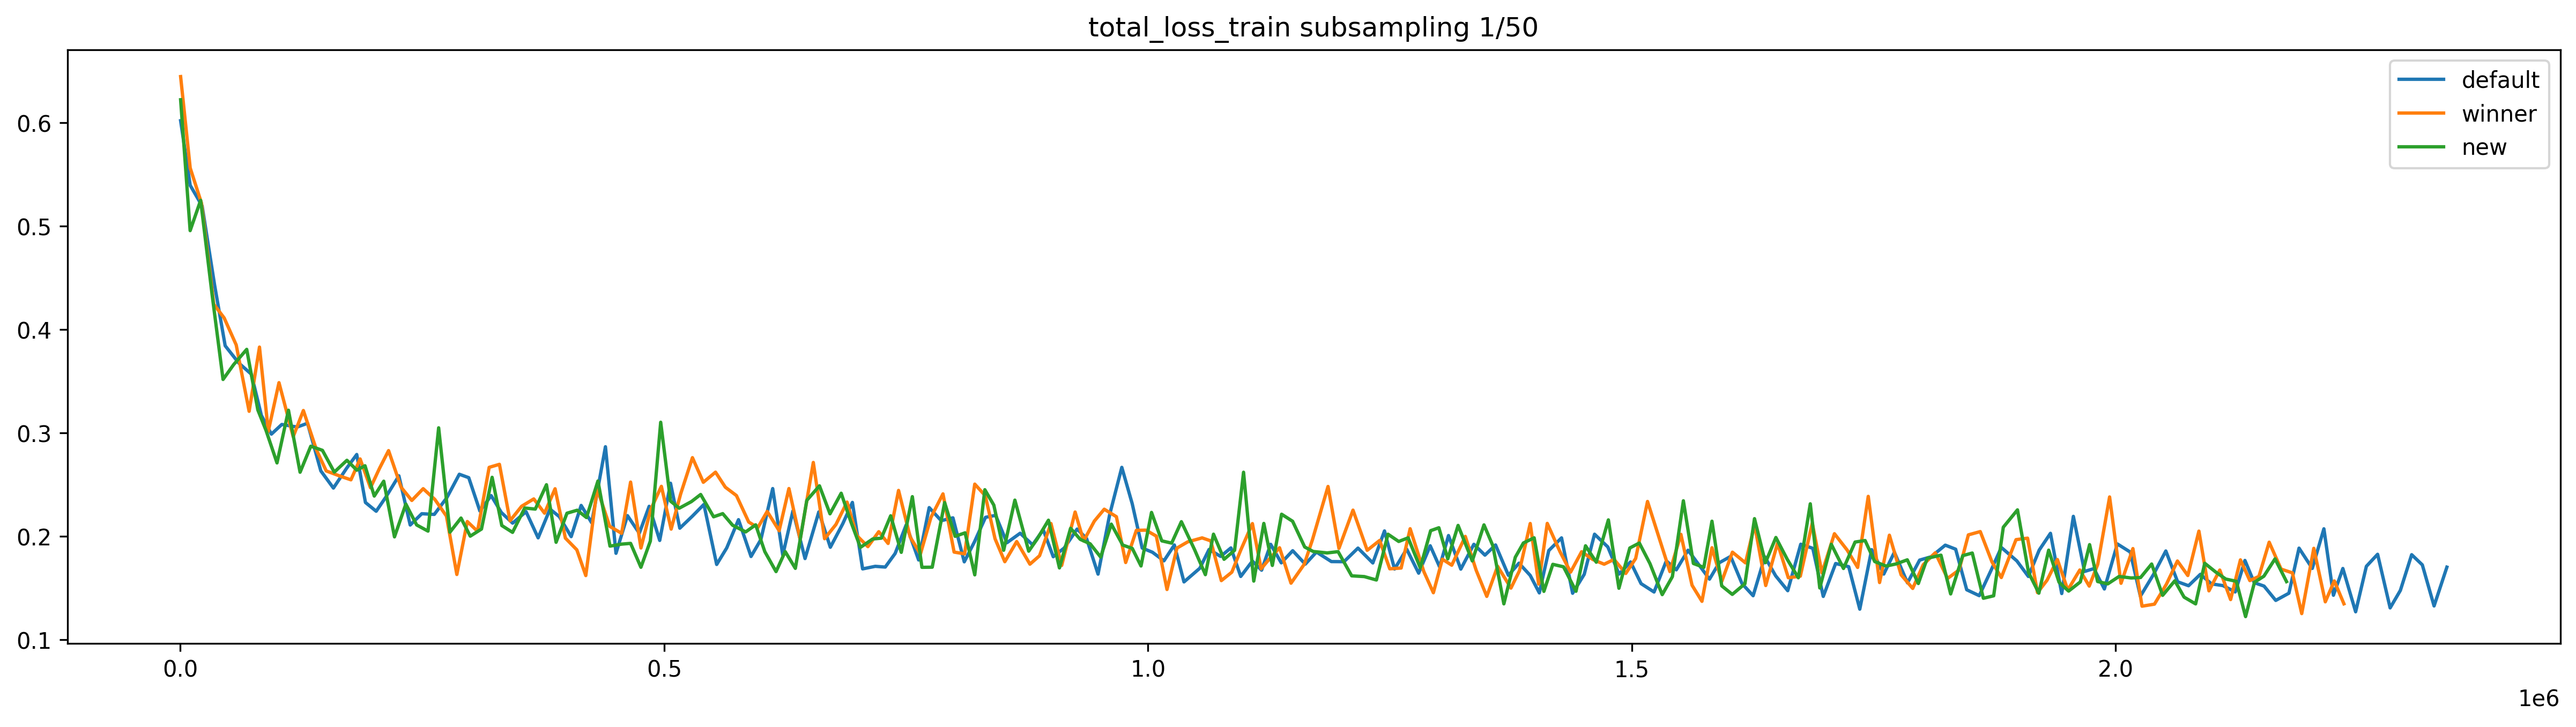

In [7]:
plot(dataframes, 'total_loss_train', smoothing=0, subsampling=50)

default
winner
new


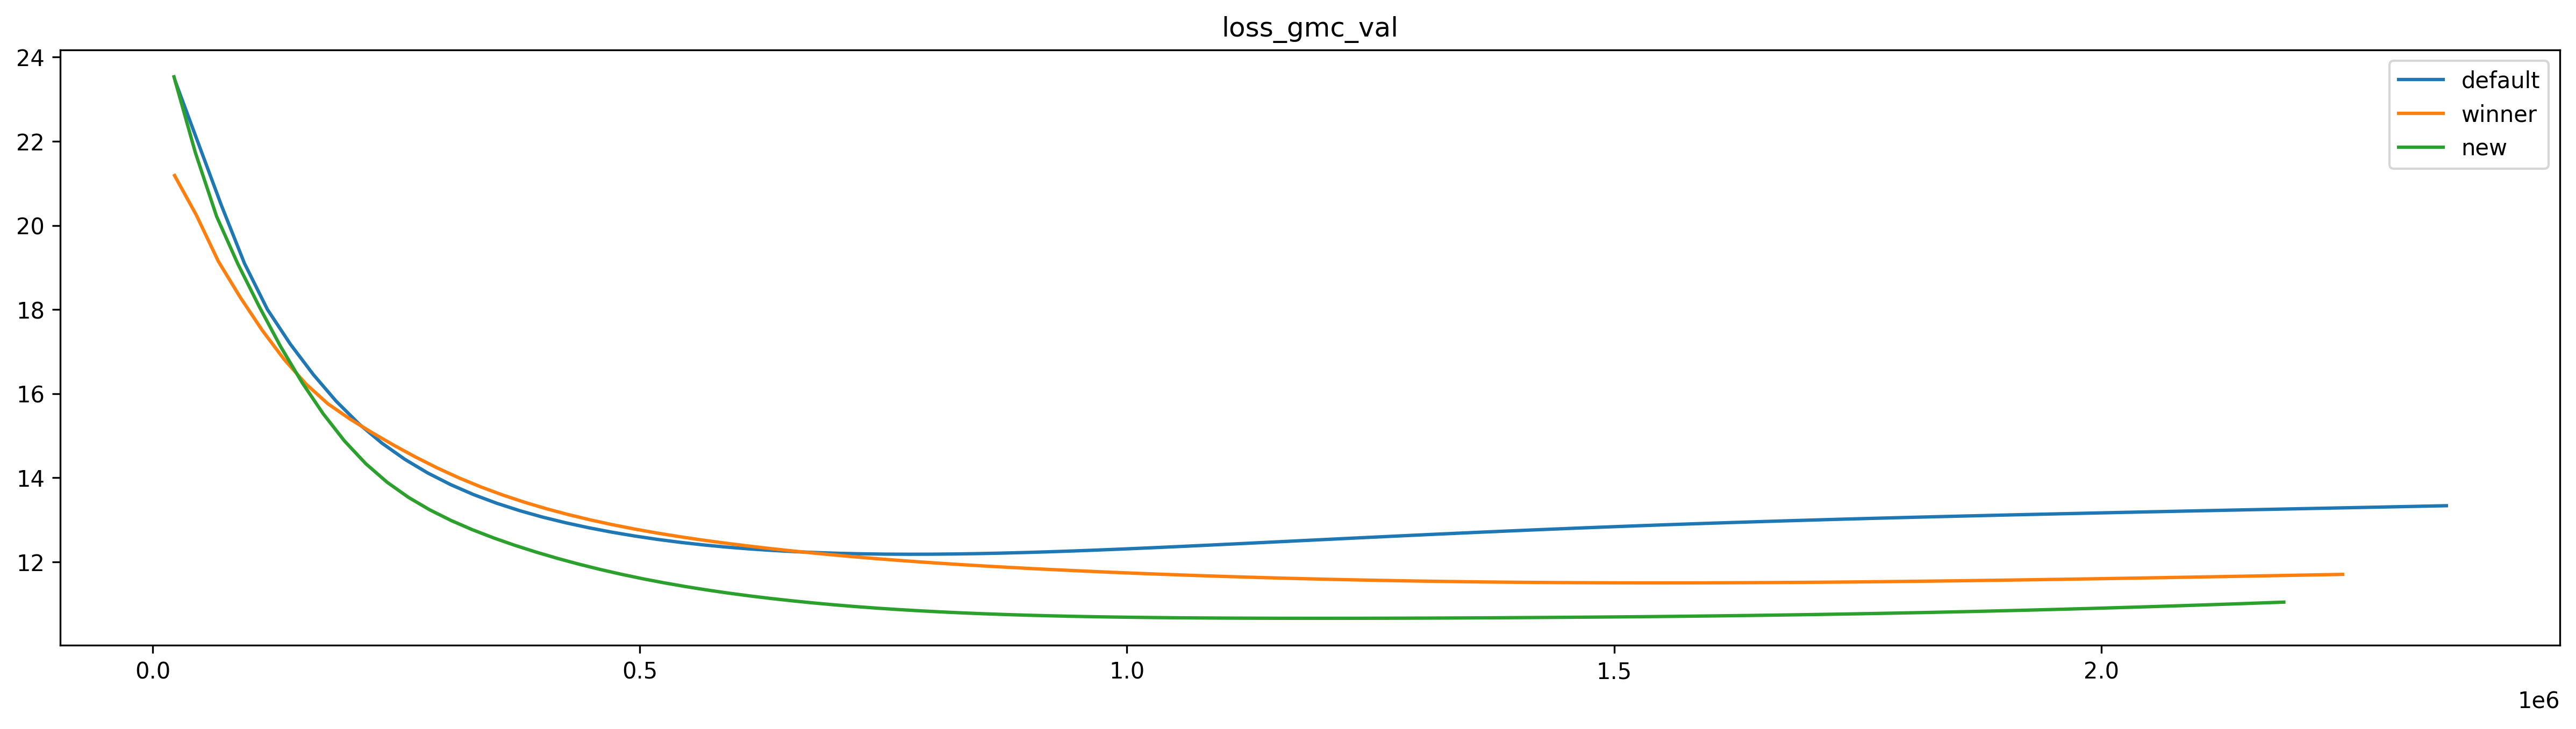

In [9]:
plot(dataframes, 'loss_gmc_val')

default
winner
new


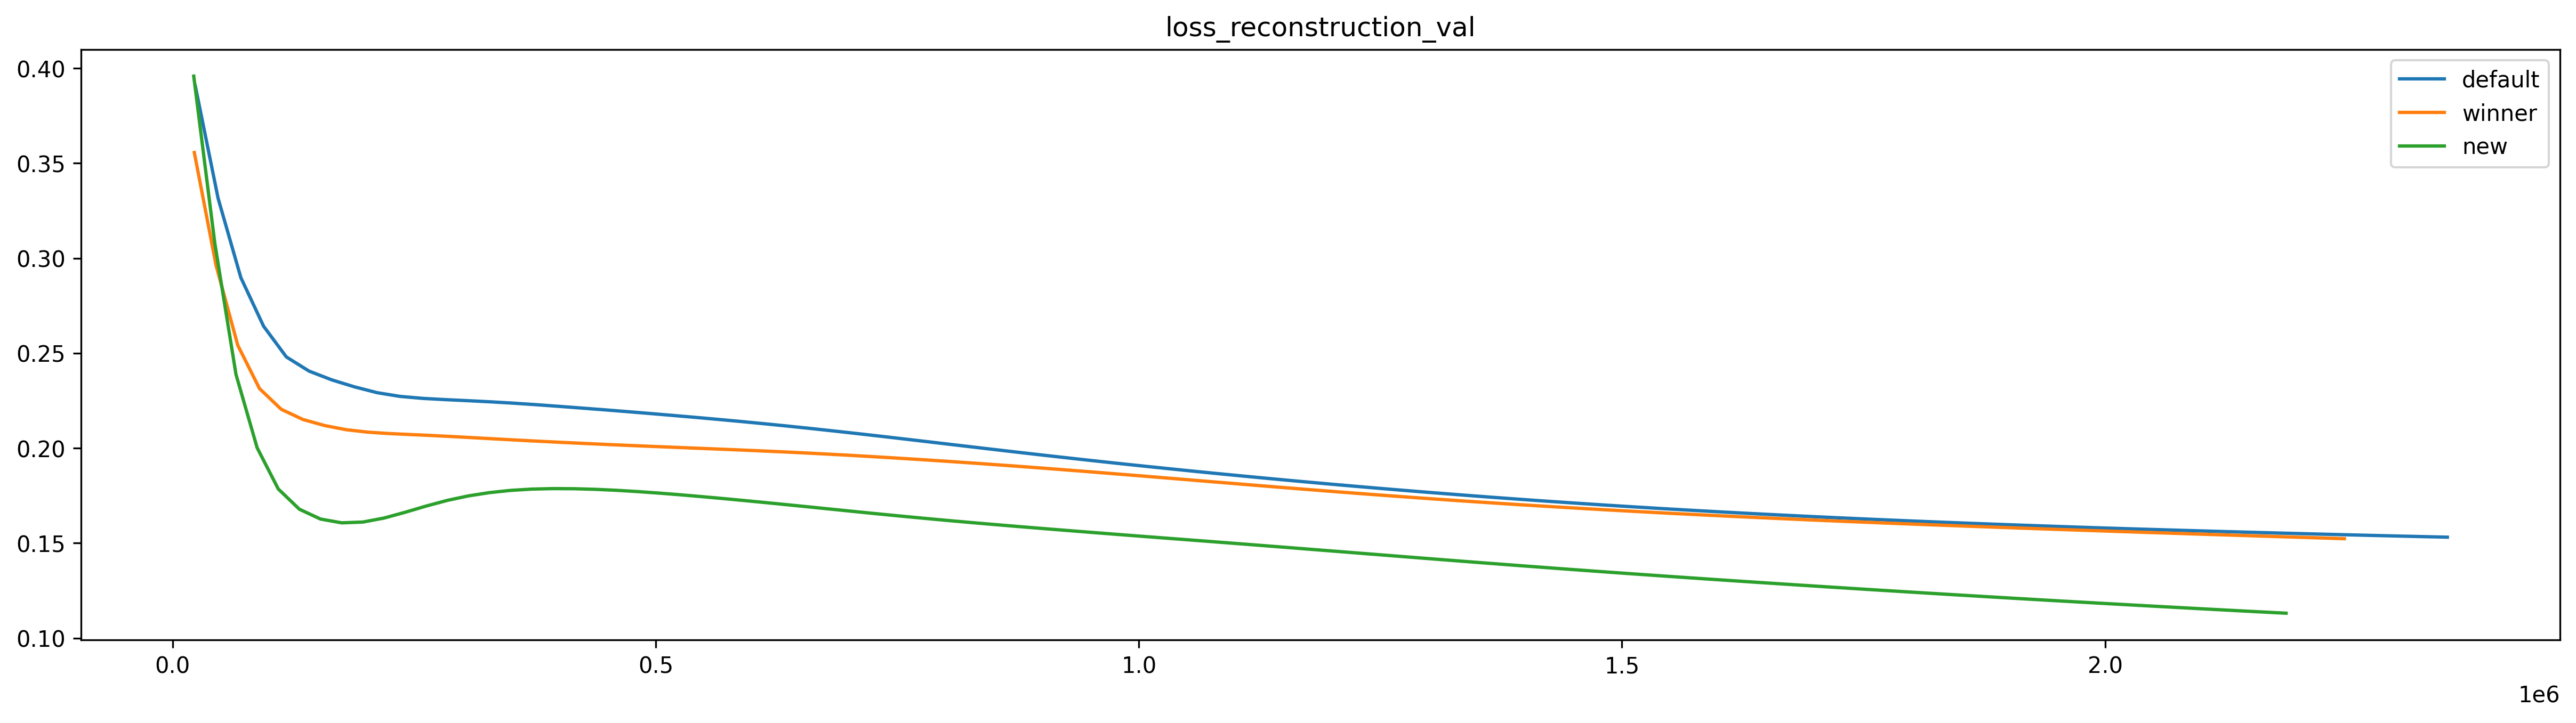

In [10]:
plot(dataframes, 'loss_reconstruction_val')

default
winner
new


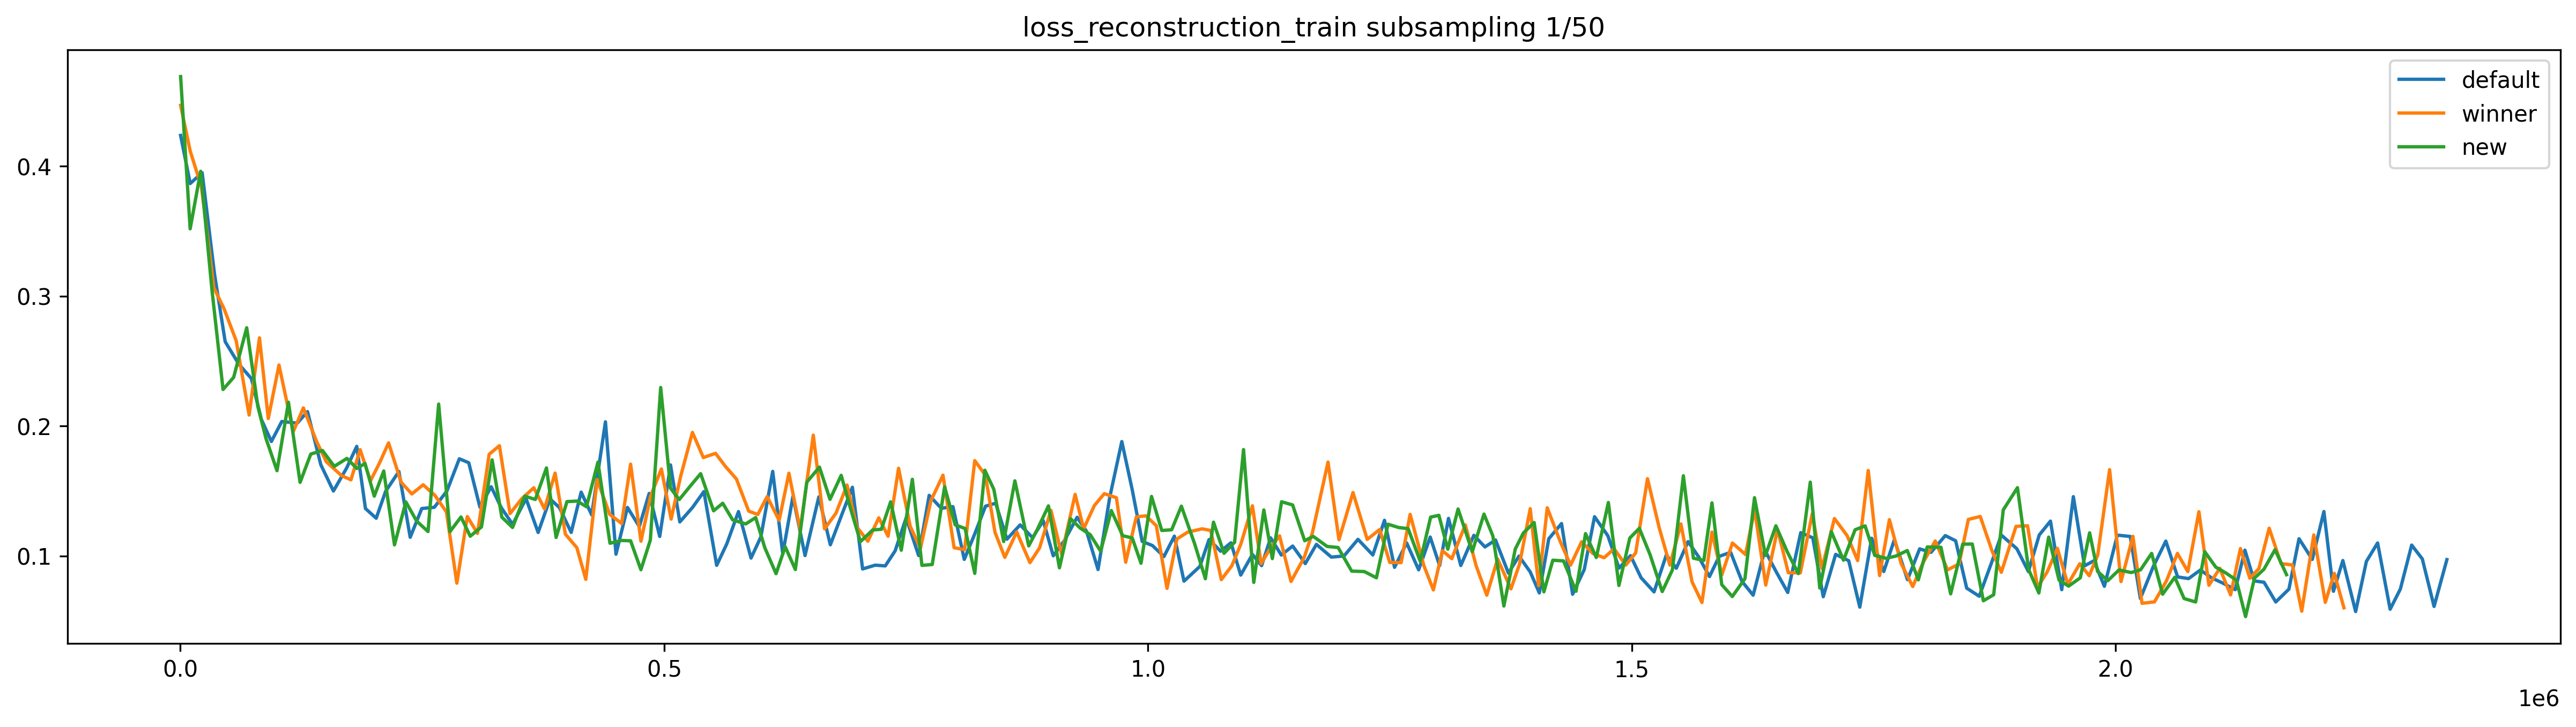

In [11]:
plot(dataframes, 'loss_reconstruction_train', smoothing=0, subsampling=50)

default
winner
new


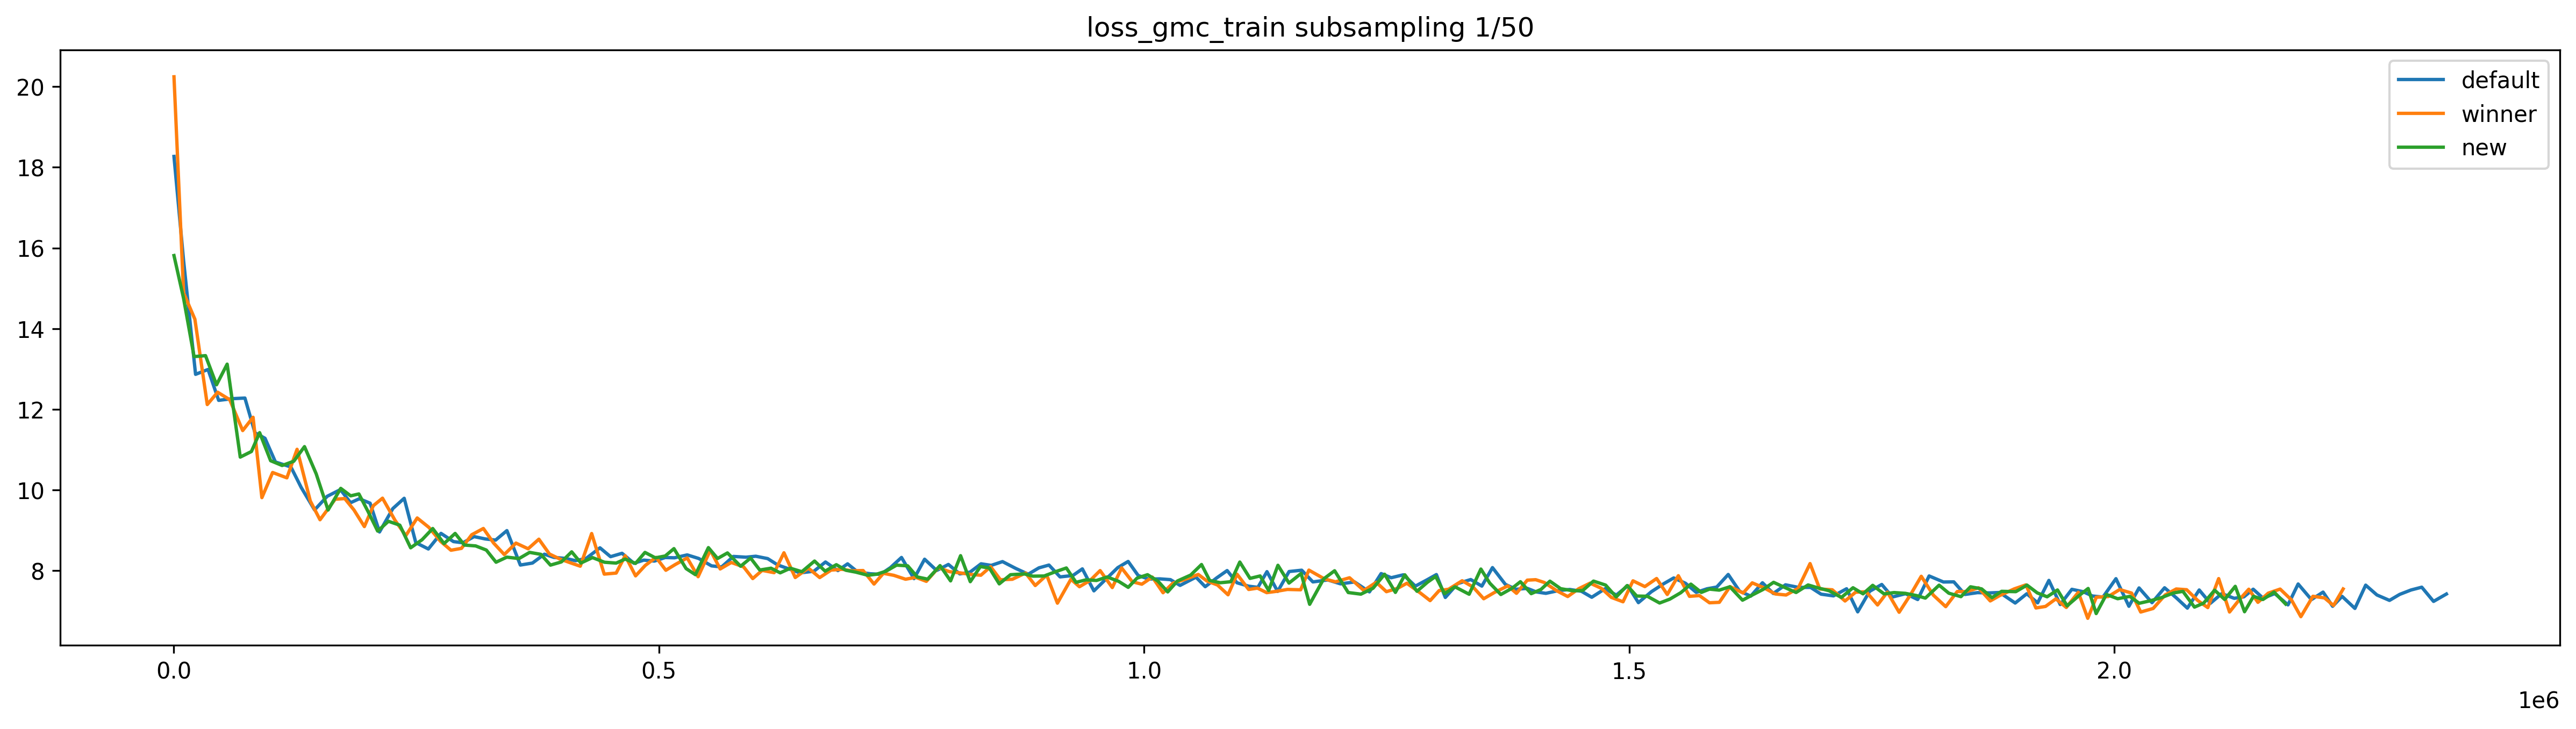

In [12]:
plot(dataframes, 'loss_gmc_train', smoothing=0, subsampling=50)

In [2]:
import os
import dill
import torch
import tqdm

In [3]:
parent_dir = '/home/thai/Downloads/PC10_Y_position_only_nobgm_train_extract_delay'
files = [os.path.join(parent_dir, f) for f in os.listdir(parent_dir)]
data = dill.load(open(files[0], 'rb'))
torch.isnan(torch.tensor(data['Audio'])).sum()

# nan_count = 0
# for f in tqdm.tqdm(files):
#     data = dill.load(open(f, 'rb'))
#     nan_count += torch.isnan(torch.tensor(data['Audio'])).sum()
# nan_count

tensor(0)

In [4]:
data

{'Audio': array([[-0.04984424, -0.03485744, -0.02837702, ...,  0.07820791,
          0.08266963,  0.08791528],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]),
 'Frame': [0.4375,
  0.25666666666666665,
  0.23854166666666668,
  0.65703125,
  1.0,
  0.4,
  0.0,
  0.5714285714285714,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.2714285714285714,
  0.245,
  0.7166666666666667,
  0.459375,
  0.87109375,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0